In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler,LabelEncoder

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage, cophenet, dendrogram

np.set_printoptions(suppress=True)   # To avoid number in exp form

from sklearn.metrics.pairwise import euclidean_distances

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [29]:
iris=sns.load_dataset('iris')

In [30]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [31]:
le=LabelEncoder()   #imported

In [32]:
iris['species']=le.fit_transform(iris['species'])

In [33]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [34]:
sc=StandardScaler()

In [35]:
for i in iris.columns:
    if i != 'species':
        iris[i]=sc.fit_transform(pd.DataFrame(iris[i]))

In [36]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0
...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,2
146,0.553333,-1.282963,0.705921,0.922303,2
147,0.795669,-0.131979,0.819596,1.053935,2
148,0.432165,0.788808,0.933271,1.448832,2


In [37]:
# Import liberary
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [38]:
lda= LinearDiscriminantAnalysis(solver='eigen')

In [39]:
# LDA return components min (classes-1, no of features)
lds=lda.fit_transform(X=iris.iloc[:,:4],y=iris['species'])

In [40]:
lds=pd.DataFrame(lds,columns=['LD1','LD2'])

In [41]:
lds

,LD1,LD2
0,8.143648,0.303471
1,7.201062,-0.794647
2,7.565869,-0.268079
3,6.882372,-0.677440
4,8.214873,0.519686
...,...,...
145,-5.702315,1.694750
146,-5.232150,-0.367165
147,-5.018176,0.829477
148,-5.945905,2.368899


In [42]:
lda.explained_variance_ratio_

array([0.9912126, 0.0087874])

In [43]:
lda.scalings_

array([[ 0.69143572,  0.02009348,  2.64941788, -0.19644128],
       [ 0.67335953,  0.94983812, -0.97437946, -0.66023806],
       [-3.91213972, -1.65627234, -4.23776425, -3.27224459],
       [-2.15676253,  2.17880821,  1.60235377,  3.1127633 ]])

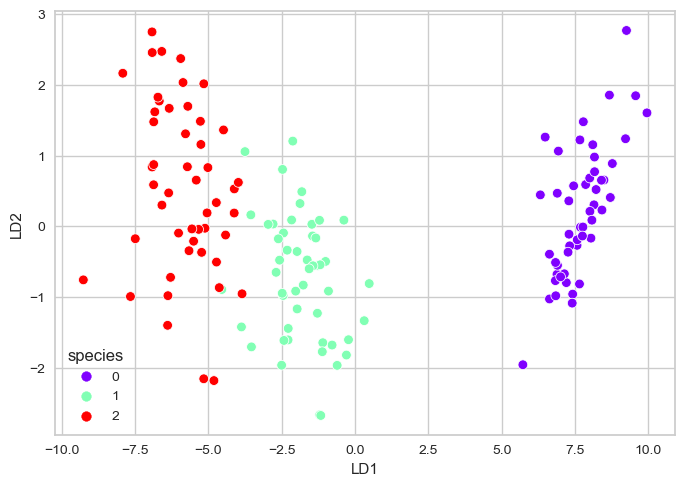

In [46]:
sns.scatterplot(x=lds['LD1'],y=lds['LD2'],hue=iris['species'],palette='rainbow')
plt.show()

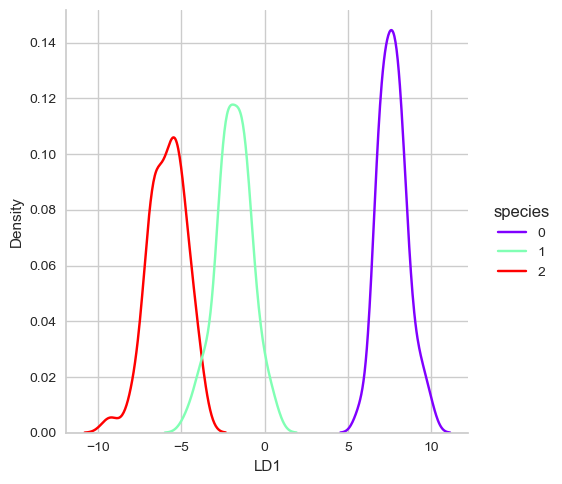

In [50]:
sns.displot(x=lds['LD1'],hue=iris['species'],kind='kde',palette='rainbow')
plt.show()